# 유성분검사성적서 전처리

In [1]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR
from utils import plot_features

In [2]:
report = pd.read_csv('../../data/raw/유성분검사성적서.csv')
df = report.copy()

/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_68249/1524675829.py:1: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  report = pd.read_csv('../../data/raw/유성분검사성적서.csv')


In [3]:
# 불필요 컬럼 drop
drop_col = [
   '혈통번호', '착유일련번호', '체점수(연계)', '유성분검사일련번호', '단백율', '고형율', '유당', '검정일시(ICT)',
'분만나이(연계)', '가수제코드(연계)', '가수제일자(연계)', '분만후첫수정일까지일수', '데이터입력코드', '최근분만일(연계)',
'최종수정일자(연계)', '최종수정횟수(연계)', '최종수정정액코드(연계)', '최근건유일(연계)', '개체명', '농장관리번호'
]

df.drop(columns=drop_col, inplace=True, errors='ignore')


In [4]:
# 불필요 행 drop
drop_row = [
    '개체번호', '비유최고도달일수', '비유후기최고유량',
    '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU', '전산차비유지속성'
]

df.dropna(subset=drop_row, inplace=True)


In [5]:
df.loc[df['농후사료급여량(연계)'] != 0, '농후사료급여량(연계)'] = 1
df.loc[df['농후사료비(연계)'] != 0, '농후사료비(연계)'] = 1

In [6]:
df.columns

col_lst = []
for col in df.columns:
    if '성년' in col:
        col_lst.append(col)

print(col_lst)

['성년유량', '성년유지량', '성년유단백량', '성년무지고형분량']


In [7]:
def replace_nan_series(data, series):
    nan_cond = True
    for col in series:
        nan_cond &= data[col] == 0
    
    data.loc[nan_cond, series] = data.loc[nan_cond, col].replace(0, np.nan)

In [8]:
series_incr = ['유지방율', '유단백', '무지고형분', '우유내요소태질소']
series_305 = ['305일유량', '305일유지량', '305일유단백', '305일무지고형분']
series_biyu = ['전산차비유지속성', '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU']
series_gun = ['건유전마지막유량', '전산차건유전유량']
series_sung = ['성년유량', '성년유지량', '성년유단백량', '성년무지고형분량']
series_san = ['산차']

series_lst = [series_incr, series_305, series_biyu, series_gun, series_sung, series_san]

for series in series_lst:
    replace_nan_series(df, series)

In [9]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False
# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

In [10]:
df

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,비유초기평균MNU,최고유량체세포,건유전마지막유량,전산차건유전유량,출생일자,산차,농후사료비(연계),농후사료급여량(연계),공태일수,유량
0,20249,2.012071e+13,20200111,154,6.31,2.86,8.43,141,29.8,9714.0,...,19.0,141.0,82.0,16.1,20120709,6.0,0.0,0.0,204,59950
1,20249,2.012063e+13,20200111,457,NaN,NaN,NaN,0,NaN,14570.0,...,12.0,47.0,69.0,17.0,20120626,4.0,0.0,0.0,269,59951
2,20249,2.012050e+13,20200111,52,6.10,2.80,8.53,34,23.7,NaN,...,22.0,50.0,47.0,22.6,20120504,5.0,0.0,0.0,175,59945
3,20249,2.011101e+13,20200111,115,4.34,3.05,8.97,106,21.3,11008.0,...,15.0,106.0,27.0,24.5,20111002,5.0,0.0,0.0,215,59947
4,20249,2.012101e+13,20200111,290,5.56,3.70,9.23,220,21.7,11318.0,...,16.0,59.0,42.0,37.8,20121014,5.0,0.0,0.0,224,59958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100544,20251,2.021023e+13,20220204,0,NaN,NaN,NaN,0,NaN,NaN,...,NaN,0.0,NaN,NaN,20210227,NaN,0.0,0.0,0,95837378
100545,20251,2.021031e+13,20220204,0,NaN,NaN,NaN,0,NaN,NaN,...,NaN,0.0,NaN,NaN,20210310,NaN,0.0,0.0,0,95837371
100546,20251,2.021053e+13,20220204,0,NaN,NaN,NaN,0,NaN,NaN,...,NaN,0.0,NaN,NaN,20210530,NaN,0.0,0.0,0,95837351
100547,20251,2.021061e+13,20220204,0,NaN,NaN,NaN,0,NaN,NaN,...,NaN,0.0,NaN,NaN,20210609,NaN,0.0,0.0,0,95837283


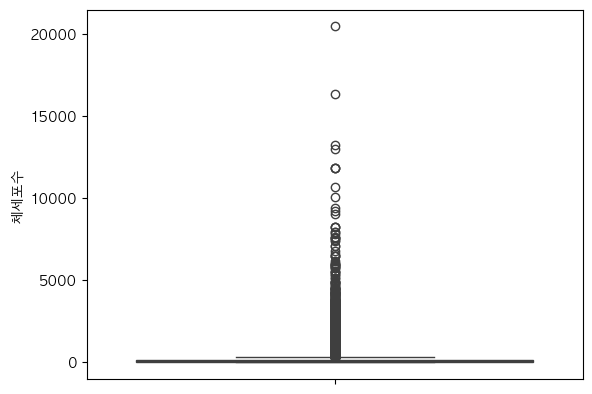

In [11]:
cond = df['체세포수'] != 0
# cond &= df['체세포수'] < 5000
temp = df[cond]
sns.boxplot(data=temp, y='체세포수')
# df[df['체세포수'] != 0]
plt.show()

In [12]:
df_copy = df.copy()
df_copy['체세포수'] = np.log1p(df['체세포수'])

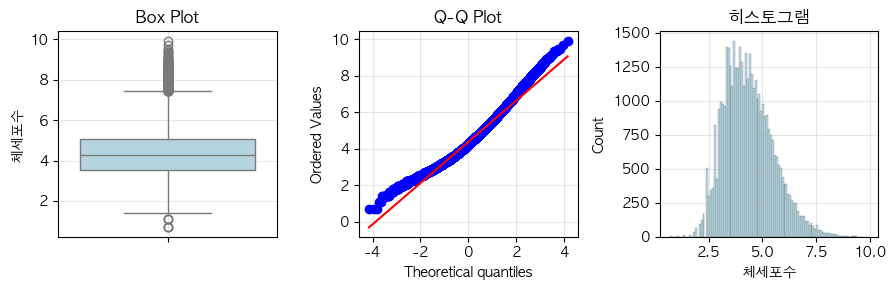

In [13]:
plot_features(df_copy[df_copy['체세포수'] != 0], ['체세포수'], ['lightblue'])

In [14]:
df.isnull().sum()

농장아이디              0
개체번호               0
검정일자               0
누적착유일(연계)          0
유지방율           49316
유단백            49316
무지고형분          49316
체세포수               0
우유내요소태질소       49316
305일유량         47722
305일유지량        47722
305일유단백        47722
305일무지고형분      47722
성년유량           47722
성년유지량          47722
성년유단백량         47722
성년무지고형분량       47722
전산차비유지속성       32960
현재산차비유지속성      32960
비유최고도달일수       32960
비유후기최고유량       32960
비유초기평균유지율      32960
비유초기평균단백율      32960
비유초기평균MNU      32960
최고유량체세포            0
건유전마지막유량       57676
전산차건유전유량       57676
출생일자               0
산차             36408
농후사료비(연계)          0
농후사료급여량(연계)        0
공태일수               0
유량                 0
dtype: int64

In [32]:
# 날짜 기준 정렬
df['검정일자'] = pd.to_datetime(df['검정일자'], format="%Y%m%d")
df = df.sort_values(['개체번호', '검정일자'])

# 개체별 전월 유량 가져오기
df['전월유량'] = df.groupby('개체번호')['유량'].shift(1)

# 유량 변화율 계산: ((현재 - 전월) / 전월) * 100
df['유량변화율(%)'] = (df['유량'] - df['전월유량']) / df['전월유량'] * 100

# 질병군 생성: 체세포수 ≥200 & 전월 대비 유량 10% 이상 감소 → 1(의심군), 나머지 0(정상군)
df['질병군'] = np.where((df['체세포수'] >= 200) & (df['유량변화율(%)'] <= -10), 1, 0)

# 우유등급 생성: 
bins = [0, 200, float('inf')]
labels = ['1등급', '2등급이하']

df['우유등급'] = pd.cut(df['체세포수'], bins=bins, labels=labels, right=False)

# 중간 계산용 컬럼 제거
df.drop(columns=['전월유량', '유량변화율(%)'], inplace=True)


In [33]:
df['우유등급'].value_counts(normalize=True, dropna=False) * 100

우유등급
1등급      90.824945
2등급이하     9.175055
Name: proportion, dtype: float64

In [34]:
dropped_df = df.dropna(subset=sum(series_lst, []), how='all')

In [35]:
dropped_df.isnull().sum()

농장아이디              0
개체번호               0
검정일자               0
누적착유일(연계)          0
유지방율           16357
유단백            16357
무지고형분          16357
체세포수               0
우유내요소태질소       16357
305일유량         14763
305일유지량        14763
305일유단백        14763
305일무지고형분      14763
성년유량           14763
성년유지량          14763
성년유단백량         14763
성년무지고형분량       14763
전산차비유지속성           1
현재산차비유지속성          1
비유최고도달일수           1
비유후기최고유량           1
비유초기평균유지율          1
비유초기평균단백율          1
비유초기평균MNU          1
최고유량체세포            0
건유전마지막유량       24717
전산차건유전유량       24717
출생일자               0
산차              3449
농후사료비(연계)          0
농후사료급여량(연계)        0
공태일수               0
유량                 0
질병군                0
우유등급               0
dtype: int64

In [36]:
dropped_df

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,건유전마지막유량,전산차건유전유량,출생일자,산차,농후사료비(연계),농후사료급여량(연계),공태일수,유량,질병군,우유등급
69280,21133,2.007121e+13,2021-03-18,445,6.60,3.28,8.87,274,11.6,15158.0,...,75.0,38.0,20071210,8.0,0.0,0.0,619,76169939,0,2등급이하
69413,21133,2.007121e+13,2021-04-28,486,3.64,3.33,8.91,166,11.0,15158.0,...,75.0,38.0,20071210,8.0,0.0,0.0,619,76170244,0,1등급
69551,21133,2.007121e+13,2021-05-20,508,2.61,3.35,9.14,156,10.8,15158.0,...,75.0,38.0,20071210,8.0,0.0,0.0,619,76170487,0,1등급
69689,21133,2.007121e+13,2021-06-25,544,3.75,3.49,8.99,307,14.1,15158.0,...,75.0,38.0,20071210,8.0,0.0,0.0,619,76170734,0,2등급이하
69827,21133,2.007121e+13,2021-07-07,556,3.68,3.74,9.31,34,16.2,15158.0,...,75.0,38.0,20071210,8.0,0.0,0.0,619,76170903,0,1등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85748,21149,2.021010e+13,2021-12-04,106,4.22,3.10,8.81,140,16.3,7577.0,...,NaN,NaN,20190723,1.0,0.0,1.0,0,76151371,0,1등급
85669,21149,2.021010e+13,2021-11-01,12,4.11,3.71,9.44,307,9.7,NaN,...,NaN,NaN,20190804,1.0,0.0,1.0,0,76151247,0,2등급이하
85749,21149,2.021010e+13,2021-12-04,45,4.38,3.17,9.09,20,14.2,NaN,...,NaN,NaN,20190804,1.0,0.0,1.0,0,76151345,0,1등급
85672,21149,2.021010e+13,2021-11-01,9,5.21,4.16,9.75,285,12.5,NaN,...,NaN,NaN,20190831,1.0,0.0,1.0,0,76151184,0,2등급이하


In [38]:
dropped_df['PF비'] = dropped_df['유단백'].div(dropped_df['유지방율'])

/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_68249/1796115418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df['PF비'] = dropped_df['유단백'].div(dropped_df['유지방율'])


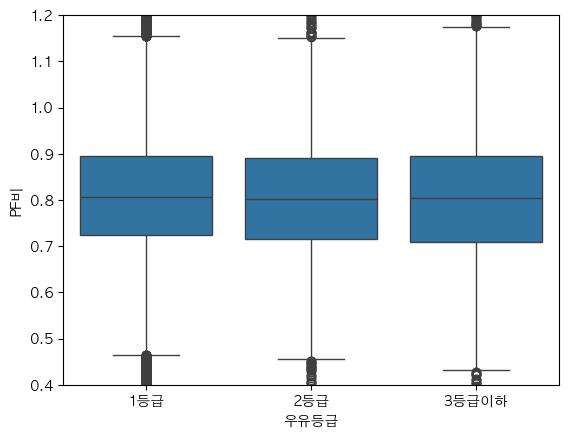

In [31]:
cond = dropped_df['PF비'] != 0
# cond &= df['체세포수'] < 5000
temp = dropped_df[cond]
sns.boxplot(data=temp, y='PF비', x='우유등급')
# df[df['체세포수'] != 0]
plt.ylim((0.4, 1.2))
plt.show()

In [39]:
# '비유초기평균MNU' -> '비유초기평균MUN'
dropped_df.rename(columns={
    '우유내요소태질소': 'MUN',
    '비유초기평균MNU': '비유초기평균MUN'
}, inplace=True)


/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_68249/3292012297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df.rename(columns={


In [40]:
dropped_df.to_csv("../../data/interim/milk.csv", index=False, encoding="utf-8")